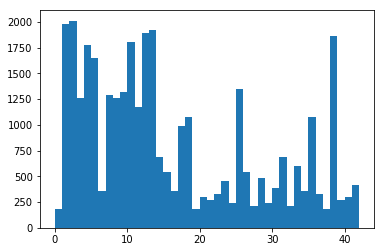

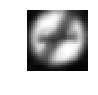

shape: (32, 32), min: 0.09213058823529413, max: 0.41472451439950986


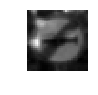

shape: (32, 32), min: 0.05897559627757353, max: 0.23410500268075982


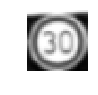

shape: (32, 32), min: 0.07269037990196078, max: 1.0


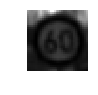

shape: (32, 32), min: 0.05033735906862745, max: 0.3516048039215687
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray
import os
import cv2

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

def Main():
    
    train_data_sizes = []
    train_data_coords = []
    train_data_features = []
    train_data_labels = []
    
    try:
        with open('G:/Udacity/Project 2/traffic-signs-data/train.p','rb') as snapFile:
        #with open('C:/Users/alsshxu/Desktop/2018 HX/UdaCity/Project 2/traffic-signs-data/train.p','rb') as snapFile:
            savedSnaps = pickle.load(snapFile)
    except IOError as e:
        return False
    #print(savedSnaps)
    train_data_sizes=savedSnaps['sizes']
    train_data_coords = savedSnaps['coords']
    train_data_features = savedSnaps['features']
    train_data_labels = savedSnaps['labels']
    train_images = rgb2gray(train_data_features)

    for i in range(0,34799):
        train_data_coords[i][0]=int(train_data_coords[i][0] * 32 / train_data_sizes[i][0])
        train_data_coords[i][1]=int(train_data_coords[i][1] * 32 / train_data_sizes[i][1])
        train_data_coords[i][2]=int(train_data_coords[i][2] * 32 / train_data_sizes[i][0])+1
        train_data_coords[i][3]=int(train_data_coords[i][3] * 32 / train_data_sizes[i][1])+1
        crop_img = train_images[i][train_data_coords[i][1]:train_data_coords[i][3], train_data_coords[i][0]:train_data_coords[i][2]]
        train_images[i] = cv2.resize(crop_img,(32,32))
    name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
    train_data_sizes = []
    train_data_coords = []
    
    plt.hist(train_data_labels, 42)
    plt.show()
    
    # Import the `pyplot` module of `matplotlib`
    # Determine the (random) indexes of the train_images that you want to see 
    traffic_signs = [1, 200, 3000, 6000]
    
    # Fill out the subplots with the random train_images that you defined 
    for i in range(len(traffic_signs)):
        plt.subplot(1, 4, i+1)
        plt.axis('off')
        plt.imshow(train_images[traffic_signs[i]], cmap='gray')
        plt.subplots_adjust(wspace=0.5)
        plt.show()
        print("shape: {0}, min: {1}, max: {2}".format(train_images[traffic_signs[i]].shape, 
                                                  train_images[traffic_signs[i]].min(), 
                                                  train_images[traffic_signs[i]].max()))
    unique_labels = set(train_data_labels)
    print(unique_labels)
    train_data_sizes = []
    train_data_coords = []
    # Import `tensorflow` 

Main()